In [1]:
 # for data import and data wrangling
import numpy as np
import pandas as pd
# for exploratory data analysis
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
# Features scaling Preprocessing
from sklearn.preprocessing import StandardScaler
# Machine Learning
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [9]:
#importing dataset CSV file
df = pd.read_csv(r"E:\Project\Own\Bank Customers_Churn\churn.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,NaN,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [4]:
#checking Info About Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      9992 non-null   float64
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9999 non-null   float64
 7   Tenure           10000 non-null  int64  
 8   Balance          9994 non-null   float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9993 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 1.1+ MB


In [5]:
#Checking Dimensions of datset rows and Columns
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
#Checking Destributions of Data Columns
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,9992.000000,9999.000000,10000.000000,9994.000000,10000.000000,10000.00000,10000.000000,9993.000000,10000.000000
mean,5000.50000,1.569094e+07,650.516914,38.921192,5.012800,76491.819200,1.530200,0.70550,0.515100,100096.196540,0.203700
std,2886.89568,7.193619e+04,96.653750,10.488155,2.892174,62404.182271,0.581654,0.45584,0.499797,57517.778393,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51011.290000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100183.050000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127653.825000,2.000000,1.00000,1.000000,149401.330000,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
#checking if there is Any null Values
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 5
Tenure              0
Balance             8
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    16
Exited              3
dtype: int64

In [15]:
df['CreditScore'].fillna(df['CreditScore'].mean(),inplace=True)

In [17]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [18]:
df['EstimatedSalary'].fillna(df['EstimatedSalary'].mean(),inplace=True)

In [ ]:
df['Balance'].fillna(df['Balance'].mean(),inplace=True)

In [20]:
df['Exited'].fillna(method='ffill',inplace=True)

In [21]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            8
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- ### Univariate Analysis

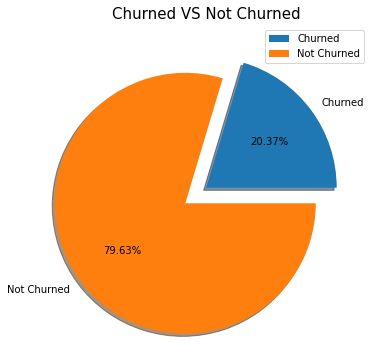

In [1185]:
#checking how many percents of Exited from the Bank
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(8, 6))
axes.pie(sizes, labels=labels,shadow=True,autopct = '%1.2f%%',explode=(0,0.2))
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

- The churn rate of customers exiting the bank is around 20.37% 
- The Customers that are not exited in the bank is around 79.63 %

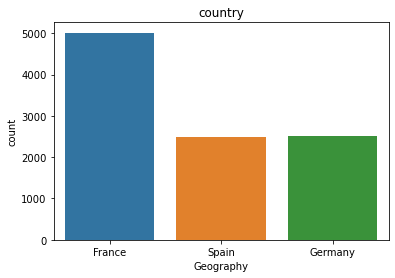

In [1186]:
#Which Countries have highest Customers
sns.countplot(x=df['Geography'])
plt.title('country')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

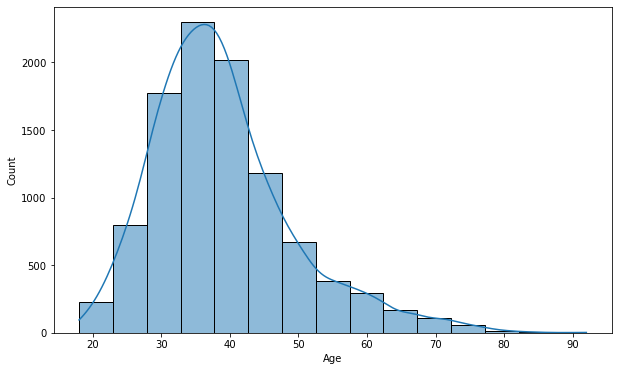

In [1187]:
#checking the data distribution of age range of Customers
plt.figure(figsize=(10,6))
sns.histplot(x='Age',data=df,kde=True,bins=15)


 - The Maximum Number of customers is between age of 30 to 50

- ###  Bivariate Analysis

Text(0.5, 1.0, 'People Exited per country')

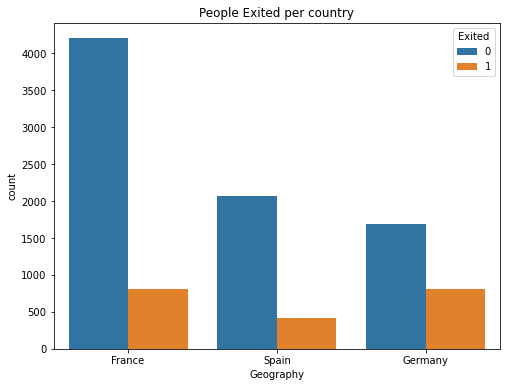

In [1188]:
#Customers From which countries Have the highest exists in Bank 
fig = plt.figure(figsize=(8,6)) 
sns.countplot(x="Geography", hue="Exited", data=df).set_title("People Exited per country")

 - Maximum Numbers of Customers in Bank are from France around 5000
 - Germeny have max churn rate and spain have low churn rate

<Figure size 1080x576 with 0 Axes>

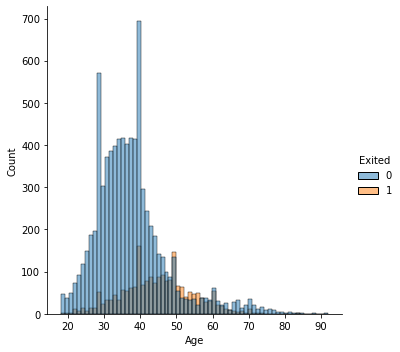

In [1189]:
plt.figure(figsize = (15,8))
sns.displot(x = 'Age', hue = 'Exited', data = df);

- Customers whose age is between 40 to 50 are more likely to exit the bank

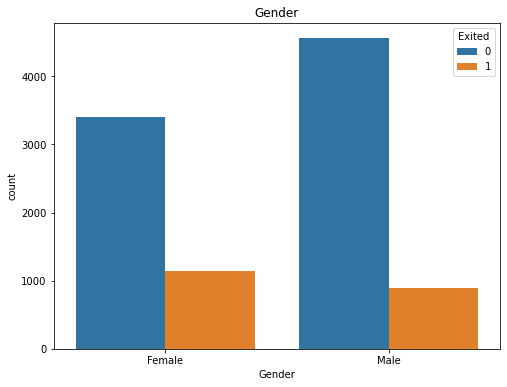

In [1190]:
plt.figure(figsize = (8,6))
sns.countplot(x='Gender',hue="Exited",data=df)
plt.title('Gender')
plt.show()

 - The female Cusotmers have more churn rate than male customers


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

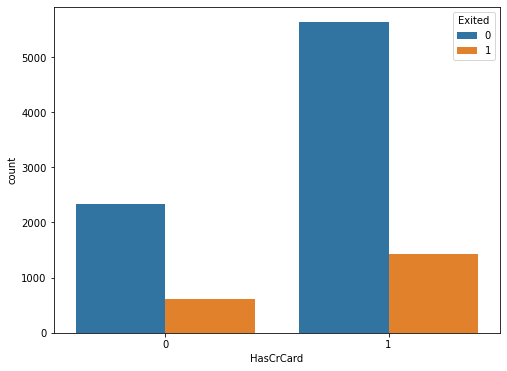

In [1191]:
plt.figure(figsize = (8,6))
sns.countplot(x="HasCrCard",hue='Exited', data=df)

- More than 5000 customers have credit card and 2000+ don't
- Customers having having credit cards are more likely to churn

- ## Multivariete Analysis

<AxesSubplot:xlabel='Age', ylabel='CreditScore'>

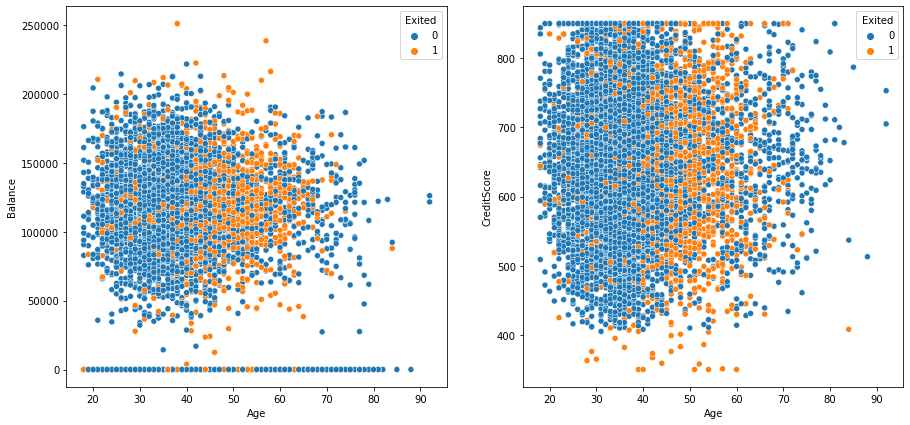

In [1192]:
# plotting scatterplot
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", sizes = (10, 200), data = df, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", sizes = (10, 200), data = df, ax=ax[1])

   - 40 to 70 years old customers are higher chances to churn
   - Customer with CreditScore less then 400 are higher chances to churn

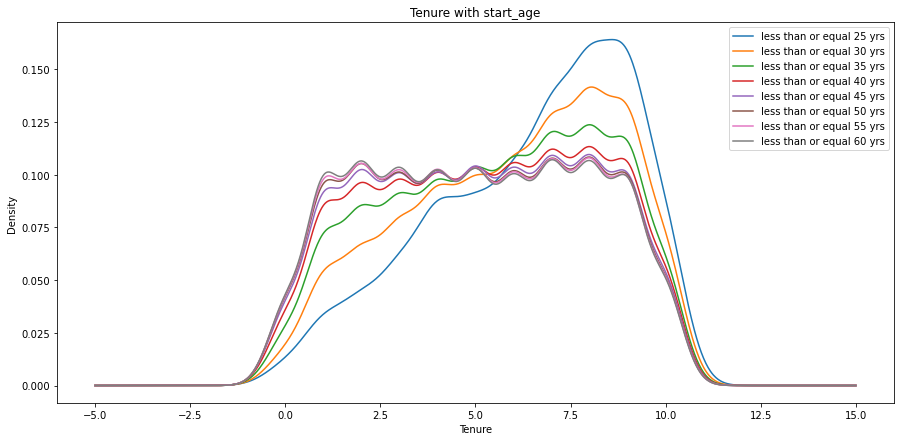

In [1193]:
# Calculating starting age from age and tenure
df['start_age'] = df['Age'] - df['Tenure']
# plotting Tenure with start age
plt.figure(figsize = (15,7))
for Age in range(25,65,5):
    df.query('start_age <= @Age')['Tenure'].plot(kind = 'kde' , title = 'Tenure with start_age', label = 'less than or equal {} yrs'.format(Age)) 
plt.xlabel('Tenure')    
plt.legend()

**Customers who start at young age are long term customers . The customers segment who start at age of 40 or above have uniform distribution across the tenure range.** 

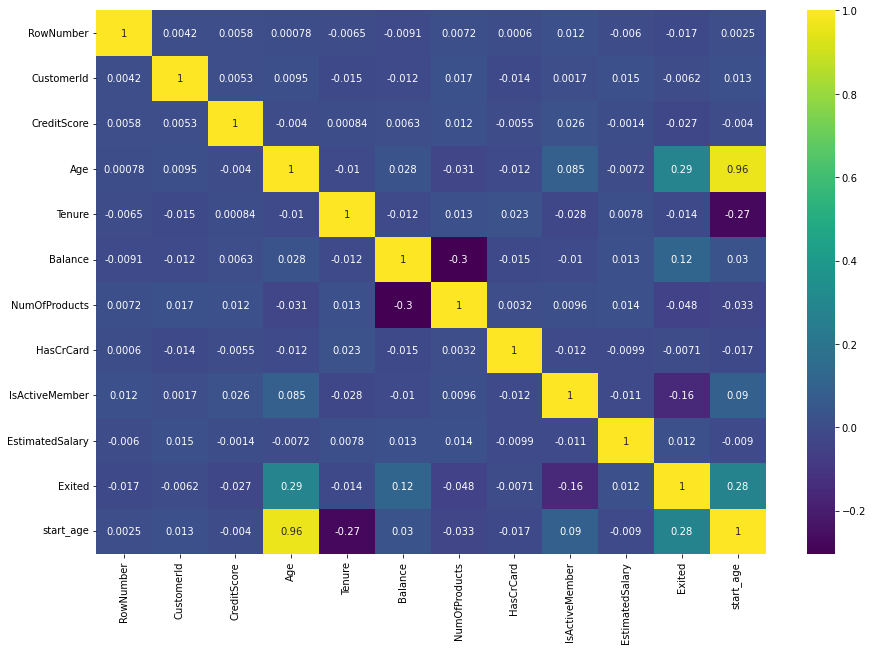

In [1194]:
#checking the Correlation of Features in datasets
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, cmap = "viridis");
plt.show()

In [1195]:
#one Hot Encoding
#Converting the gender columns numerical values
gender_dummy = pd.get_dummies(df['Gender'])
gender_dummy = pd.get_dummies(df['Gender'],drop_first=True)
gender_dummy

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [1196]:
#converting into dummy Variables
geo_dummy = pd.get_dummies(df['Geography'])
geo_dummy = pd.get_dummies(df['Geography'],drop_first=True)
geo_dummy

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [1197]:
#Concatinating dummy variables with Dataframe
df1= pd.concat([df,gender_dummy,geo_dummy],axis=1)


In [1198]:
# Dropping unwanted Features
df1.drop(['RowNumber','CustomerId','Surname','Geography','Gender'],axis=1,inplace=True)

In [1199]:
# assigining input and output variables
x=df1.drop(['Exited'],axis=1)
y=df1['Exited']

### **Feature Selection**

In [1200]:
# Feature Selection Process
feature_names = [features for features in (x.columns)]
feature_names

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'start_age',
 'Male',
 'Germany',
 'Spain']

In [1201]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train= train_test_split(x,y,test_size=0.3,random_state=42)

In [1202]:
clf= RandomForestClassifier(n_estimators=100,max_depth=5,criterion='entropy',random_state=0)

In [1203]:
# Fitting Newly EXtracted Features into Model
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=0)

In [1204]:
# Predcitions
y_pred_r= clf.predict(x_test)

In [1205]:
# Checking Accuracy Of New Model
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_r,y_test))
print('Accuracy of the Model is :', accuracy_score(y_pred_r,y_test)*100)

[[5454  960]
 [  93  493]]
Accuracy of the Model is : 84.95714285714286


In [1206]:
# Feature importence using random forest
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)


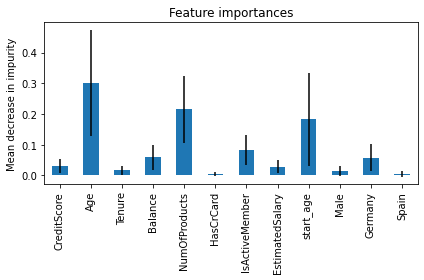

In [1207]:
# Feature Selection
# Plotting
clf_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
clf_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [1208]:
# Important extracted features are 'CreditScore','Age','NumOfProducts','IsActiveMember','Balance','Germany'
x = x[['Age','NumOfProducts','IsActiveMember','start_age','Balance','Germany']]
y=df1['Exited']

In [1209]:
#recreating a model for Better Accuracy
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train= train_test_split(x,y,test_size=0.3,random_state=42)

In [1210]:
# feature Scaling
scaler = StandardScaler()
print(scaler.fit(x_train))
MinMaxScaler()
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

StandardScaler()


In [1211]:
#logistic classifier
lr=LogisticRegression(solver='liblinear')
lr.fit(x_train,y_train)
y_pred_log = lr.predict(x_test)

In [1212]:
print(confusion_matrix(y_pred_log,y_test))
print('Accuracy of the Model is :', accuracy_score(y_pred_log,y_test)*100)

[[5374 1159]
 [ 173  294]]
Accuracy of the Model is : 80.97142857142858


In [1213]:
# Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='gini',max_depth=8,max_leaf_nodes=6)
clf2.fit(x_train,y_train)
y_pred_des = clf2.predict(x_test)

In [1214]:
print(confusion_matrix(y_pred_des,y_test))
print('Accuracy of the Model is :', accuracy_score(y_pred_des,y_test)*100)

[[5425  994]
 [ 122  459]]
Accuracy of the Model is : 84.05714285714285


[Text(228.27272727272728, 332.955, 'X[0] <= 0.338\ngini = 0.314\nsamples = 3000\nvalue = [2416, 584]'),
 Text(101.45454545454545, 237.825, 'X[1] <= 1.636\ngini = 0.19\nsamples = 2131\nvalue = [1905, 226]'),
 Text(50.72727272727273, 142.695, 'gini = 0.171\nsamples = 2089\nvalue = [1892, 197]'),
 Text(152.1818181818182, 142.695, 'gini = 0.427\nsamples = 42\nvalue = [13, 29]'),
 Text(355.09090909090907, 237.825, 'X[2] <= -0.031\ngini = 0.485\nsamples = 869\nvalue = [511, 358]'),
 Text(253.63636363636363, 142.695, 'X[0] <= 0.912\ngini = 0.479\nsamples = 391\nvalue = [155, 236]'),
 Text(202.9090909090909, 47.565, 'gini = 0.496\nsamples = 236\nvalue = [128, 108]'),
 Text(304.3636363636364, 47.565, 'gini = 0.288\nsamples = 155\nvalue = [27, 128]'),
 Text(456.54545454545456, 142.695, 'X[1] <= 1.636\ngini = 0.38\nsamples = 478\nvalue = [356, 122]'),
 Text(405.8181818181818, 47.565, 'gini = 0.354\nsamples = 457\nvalue = [352, 105]'),
 Text(507.27272727272725, 47.565, 'gini = 0.308\nsamples = 21\

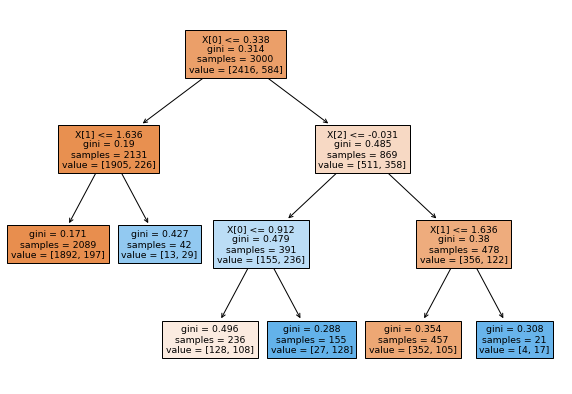

In [1215]:
fig = plt.figure(figsize=(10,7))
tree.plot_tree(clf2,filled=True)

In [1216]:
clf1= RandomForestClassifier(n_estimators=100,max_depth=5,criterion='gini',random_state=0)
# Fitting Newly EXtracted Features into Model
clf1.fit(x_train,y_train)
# Predcitions
y_pred_new= clf1.predict(x_test)


In [1217]:
# Checking Accuracy Of a Model
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_pred_new,y_test))
print('Accuracy of the Model is :', accuracy_score(y_pred_new,y_test)*100)

[[5419  864]
 [ 128  589]]
Accuracy of the Model is : 85.82857142857144
